In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict

## Dataset

In [2]:
dataset = np.array([
    [1, 0, 2],
    [1, -2.5, -5],
    [1, 1, -1],
    [1, -3 , 4], 
    [0, 7, -1],
    [0, 8, -4],
    [0, 5, 3],
])

## Plotando o dataset

In [3]:
def plot_amostras(dataset, plt):
    for amostra in dataset:
        if amostra[0]>0:
            plt.scatter(amostra[1], amostra[2],color='orange', marker='o',s=70,label="maçã Fuji")
        else:
            plt.scatter(amostra[1], amostra[2],color='green', marker='o',s=70,label="maçã red")
    plt.ylabel('Comprimento')
    plt.xlabel('Peso')
    axes = plt.gca()
    axes.set_xlim([-10, 10])
    axes.set_ylim([-10, 10])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    

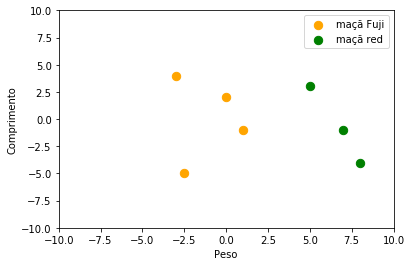

In [4]:
plot_amostras(dataset, plt)

## Incializando os parâmetros do neurônio

In [5]:
w = np.array([-0.5,0.2])
w0 = np.array([-0.2])

## Plotando a reta de separação definida pelo neurônio

In [6]:
def reta_neuronio(x1, w, w0):
    x2 = (-w[0]*x1 - w0)/w[1]
    return x2

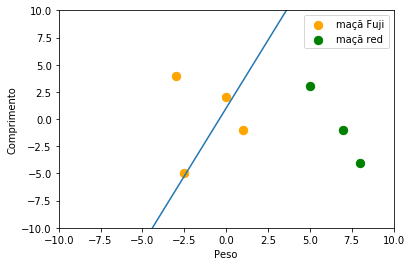

In [7]:
x1 = np.array(range(-20, 20))
x2 = reta_neuronio(x1, w, w0)
plt.plot(x1, x2)
plot_amostras(dataset, plt)

## Loop de treinamento

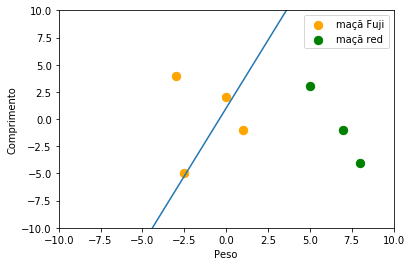

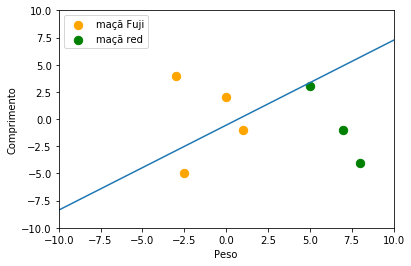

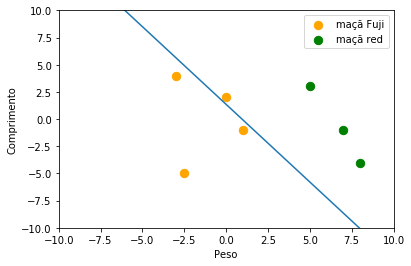

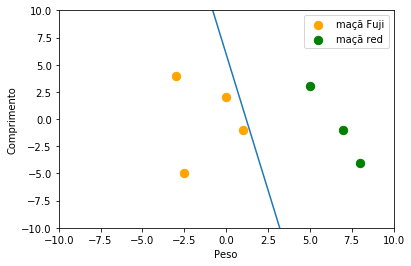

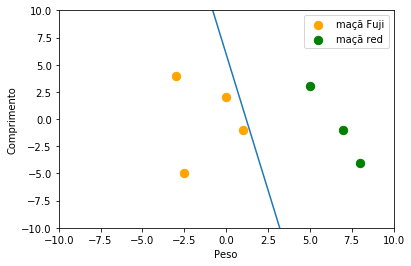

In [8]:
num_epocas = 5

for _ in range(num_epocas):
    x2 = reta_neuronio(x1, w, w0)
    plt.plot(x1, x2)
    plot_amostras(dataset, plt)
    plt.show()  
    for x in dataset:
        
        g = w[0]*x[1] + w[1]*x[2]  + w0
        
        if(g>0 and x[0]==0):
            w = w - x[1:]
            w0 = w0 - 1
            
        if(g<0 and x[0]==1):
            w = w + x[1:]
            w0 = w0 + 1
            


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')
    